In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Linear%20Regression/laptop_prices.csv"

--2024-12-10 14:58:29--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/1)%20Regression%20Models/Linear%20Regression/laptop_prices.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191364 (187K) [text/plain]
Saving to: ‘laptop_prices.csv’

laptop_prices.csv   100%[===================>] 186.88K  --.-KB/s    in 0.03s   

2024-12-10 14:58:29 (5.33 MB/s) - ‘laptop_prices.csv’ saved [191364/191364]



In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [5]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [6]:
df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
Ram,int64
OS,object
Weight,float64
Price_euros,float64
Screen,object
ScreenW,int64


In [7]:
df_reduced = df.drop(columns=[
    'Product', 'CPU_model', 'GPU_model', 'PrimaryStorageType', 'SecondaryStorageType',
    'Screen', 'TypeName', 'Touchscreen', 'IPSpanel', 'RetinaDisplay'
])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

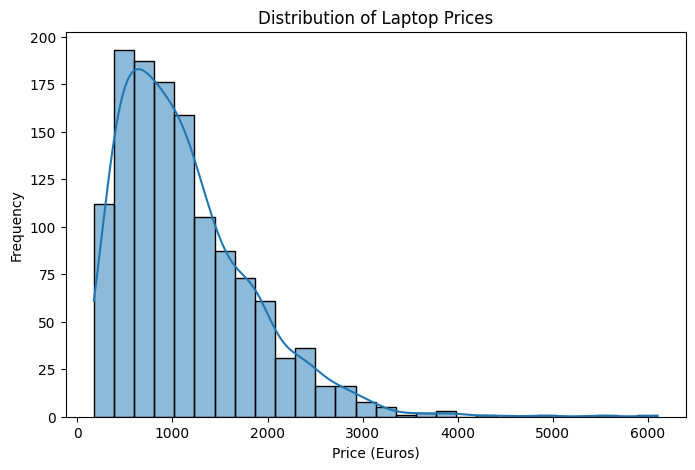

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df_reduced['Price_euros'], kde = True,bins = 28)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.show()

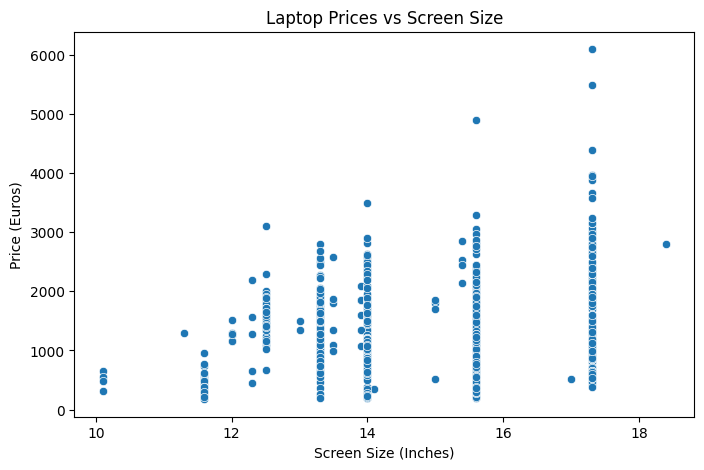

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df_reduced['Inches'], y = df_reduced['Price_euros'])
plt.title('Laptop Prices vs Screen Size')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (Euros)')
plt.show()

In [11]:
Q1 = df_reduced['Inches'].quantile(0.25)
Q3 = df_reduced['Inches'].quantile(0.75)
IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR

df_reduced['Inches'] = df_reduced['Inches'].apply(lambda x: lb if x < lb else (up if x > up else x))

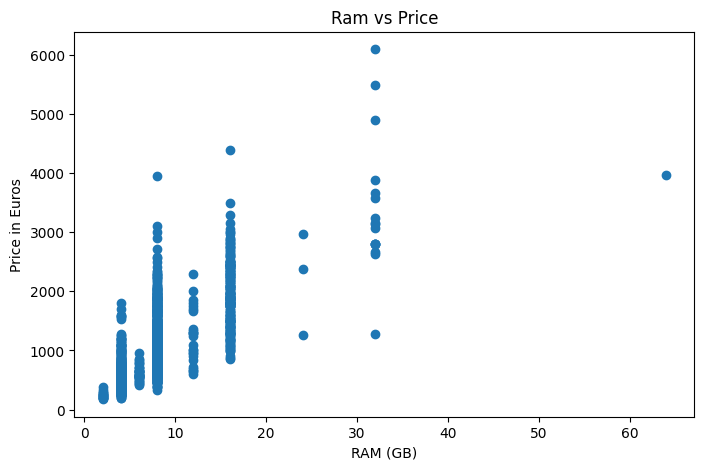

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(df_reduced['Ram'], df_reduced['Price_euros'])
plt.title('Ram vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price in Euros')
plt.show()

In [13]:
Q1 = df_reduced['Ram'].quantile(0.25)
Q3 = df_reduced['Ram'].quantile(0.75)
IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR

df_reduced['Ram'] = df_reduced['Ram'].apply(lambda x: lb if x < lb else (up if x > up else x))

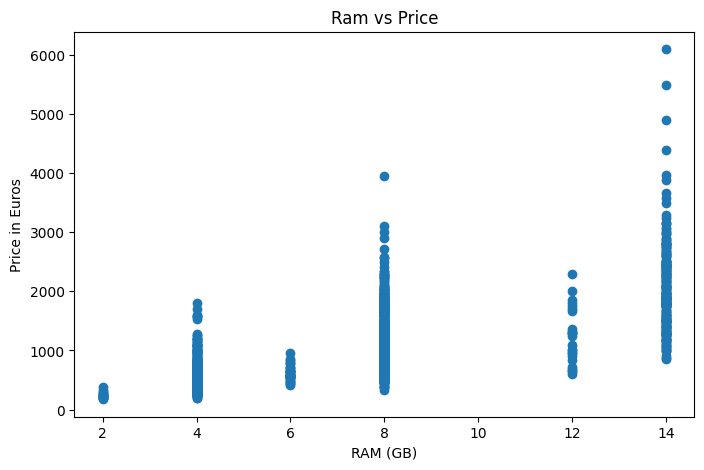

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(df_reduced['Ram'], df_reduced['Price_euros'])
plt.title('Ram vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price in Euros')
plt.show()

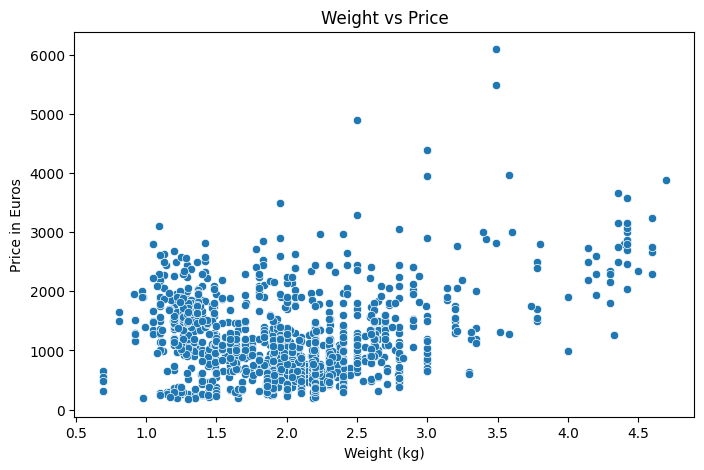

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df_reduced['Weight'], y =df_reduced['Price_euros'])
plt.title('Weight vs Price')
plt.xlabel('Weight (kg)')
plt.ylabel('Price in Euros')
plt.show()

In [16]:
Q1 = df_reduced['Weight'].quantile(0.25)
Q3 = df_reduced['Weight'].quantile(0.75)
IQR = Q3 - Q1

lb = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR

df_reduced['Weight'] = df_reduced['Weight'].apply(lambda x: lb if x<lb else (up if x > up else x))

In [17]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Inches            1275 non-null   float64
 2   Ram               1275 non-null   float64
 3   OS                1275 non-null   object 
 4   Weight            1275 non-null   float64
 5   Price_euros       1275 non-null   float64
 6   ScreenW           1275 non-null   int64  
 7   ScreenH           1275 non-null   int64  
 8   CPU_company       1275 non-null   object 
 9   CPU_freq          1275 non-null   float64
 10  PrimaryStorage    1275 non-null   int64  
 11  SecondaryStorage  1275 non-null   int64  
 12  GPU_company       1275 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 129.6+ KB


In [18]:
Categories = df_reduced.columns[df_reduced.dtypes == 'object']

In [19]:
for i in Categories:
  print(i)

Company
OS
CPU_company
GPU_company


In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in Categories:
  df_reduced[col] = encoder.fit_transform(df_reduced[col])

In [21]:
df_reduced.head()

,Company,Inches,Ram,OS,Weight,Price_euros,ScreenW,ScreenH,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,GPU_company
0,1,13.3,8.0,8,1.37,1339.69,2560,1600,1,2.3,128,0,2
1,1,13.3,8.0,8,1.34,898.94,1440,900,1,1.8,128,0,2
2,7,15.6,8.0,4,1.86,575.00,1920,1080,1,2.5,256,0,2
3,1,15.4,14.0,8,1.83,2537.45,2880,1800,1,2.7,512,0,0
4,1,13.3,8.0,8,1.37,1803.60,2560,1600,1,3.1,256,0,2


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df_reduced)

In [23]:
scaled_df = pd.DataFrame(scaled, columns = df_reduced.columns)
scaled_df.head()

,Company,Inches,Ram,OS,Weight,Price_euros,ScreenW,ScreenH,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,GPU_company
0,-1.333546,-1.221911,0.050587,3.081382,-1.085809,0.292259,1.338239,1.853934,0.216459,-0.005918,-0.866236,-0.423449,-0.039845
1,-1.333546,-1.221911,0.050587,3.081382,-1.136229,-0.336954,-0.932863,-0.612830,0.216459,-0.998674,-0.866236,-0.423449,-0.039845
2,0.131784,0.404918,0.050587,-0.787414,-0.262293,-0.799410,0.040466,0.021481,0.216459,0.391185,-0.515929,-0.423449,-0.039845
3,-1.333546,0.263455,1.809631,3.081382,-0.312712,2.002178,1.987125,2.558724,0.216459,0.788288,0.184684,-0.423449,-2.201665
4,-1.333546,-1.221911,0.050587,3.081382,-1.085809,0.954536,1.338239,1.853934,0.216459,1.582493,-0.515929,-0.423449,-0.039845


In [24]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop(columns='Price_euros')
y = scaled_df[['Price_euros']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.38734978287349175
R² Score: 0.6170754284382859


In [31]:
from sklearn.linear_model import Ridge

In [32]:
ridge_model = Ridge(alpha= 0.01)

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Mean Squared Error: {mse_ridge}")
print(f"Ridge R² Score: {r2_ridge}")

Ridge Mean Squared Error: 0.38735101368548003
Ridge R² Score: 0.6170742116874985


In [33]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.001)

las.fit(X_train, y_train)

y_pred_las = las.predict(X_test)

mse_las = mean_squared_error(y_test, y_pred_las)
r2_las = r2_score(y_test, y_pred_las)

print(f"Lasso Mean Squared Error: {mse_las}")
print(f"Lasso R² Score: {r2_las}")

Lasso Mean Squared Error: 0.38817611550107894
Lasso R² Score: 0.6162585361064019


In [34]:
import pickle

In [35]:
with open('LinearRegressionModel.pkl', 'wb') as file:
  pickle.dump(lr, file)